# Resetting and reanalyzing our student exam dataset: Group 7

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # for performance evaluation
from sklearn.metrics import confusion_matrix  # for confusion matrix


predf = pd.read_csv('PreppedExamData.csv')
dfprep = predf[:] #copies the whole file lol?? also:
dfprep = dfprep.drop(columns = dfprep.columns[0], axis = 1)

In [41]:
dfprep.rename({'test prep' : 'preptemp', 'gender' : 'gendertemp', 'lunch program' : 'lunchtemp', 'race_eth' : 'racetemp', 'parent edu' : 'partemp'}, axis=1, inplace=True)
# we're going to replace these columns, so i've changed the names so the REPLACEMENTS can take them
dfprep.head(5)

,gendertemp,racetemp,partemp,lunchtemp,preptemp,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
dfprep.to_csv('PreppedExamData_copy.csv', index = False) # so it doesn't throw errors over and over...
df = pd.read_csv('PreppedExamData_copy.csv', index_col=False) # i found that renaming the columns does NOT make this guy happy

okay yeah. so the change to binary didn't transfer...let's just redo it here (rather than redownload a fixed csv file) 😃

should we change partemp and racetemp to numbers? looking back after completing this model, it doesn't seem to matter too much. still, let's do it (at least for consistency)

In [43]:
#PAGE 234

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['race_eth'] = labelencoder.fit_transform(df['racetemp'])
df['parent_edu'] = labelencoder.fit_transform(df['partemp'])
#best practice would be using ordinal encoder for parent_edu, but it
#Will Not work, so we'll have to settle...

df = df.drop(columns = ['racetemp', 'partemp'], axis=1)


#okay. i did dummies but this is much easier, so lets do label encoder
df['testprep'] = labelencoder.fit_transform(df['preptemp'])
df['gender'] = labelencoder.fit_transform(df['gendertemp'])
df['lunch_program'] = labelencoder.fit_transform(df['lunchtemp'])
df['testprep'] = df['testprep'].replace({0: 1, 1: 0}) #originally, it was complete:0, none:1. i'm swapping them here
df['lunch_program'] = df['lunch_program'].replace({0: 1, 1: 0}) #originally, it was free/red:0, standard:1. swapping again
#why? 0 is usually the default value. putting none and standard for 0 makes the most sense because
#this is the value if there was no information at all.


df = df.drop(columns = ['gendertemp', 'lunchtemp', 'preptemp'], axis=1)

df.head(5)

,math score,reading score,writing score,race_eth,parent_edu,testprep,gender,lunch_program
0,72,72,74,1,1,0,0,0
1,69,90,88,2,4,1,0,0
2,90,95,93,1,3,0,0,0
3,47,57,44,0,0,0,1,1
4,76,78,75,2,4,0,1,0


In [44]:
print(df.describe())
print(f'\n\nMedian: \n{df.median()}')
#hey, now we can get numbers for our string categories!

       math score  reading score  writing score     race_eth   parent_edu  \
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000   
mean     66.08900      69.169000      68.054000     2.174000     2.486000   
std      15.16308      14.600192      15.195657     1.157179     1.829522   
min       0.00000      17.000000      10.000000     0.000000     0.000000   
25%      57.00000      59.000000      57.750000     1.000000     1.000000   
50%      66.00000      70.000000      69.000000     2.000000     2.000000   
75%      77.00000      79.000000      79.000000     3.000000     4.000000   
max     100.00000     100.000000     100.000000     4.000000     5.000000   

          testprep       gender  lunch_program  
count  1000.000000  1000.000000    1000.000000  
mean      0.358000     0.482000       0.355000  
std       0.479652     0.499926       0.478753  
min       0.000000     0.000000       0.000000  
25%       0.000000     0.000000       0.000000  
50%       0.

correlation test....

<Axes: >

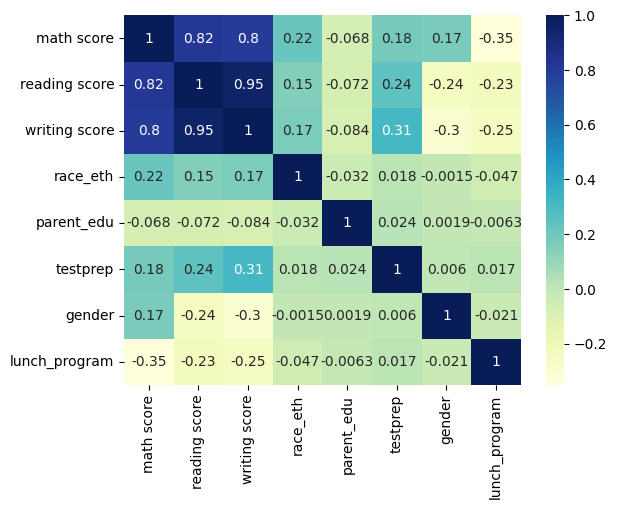

In [45]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu')

As shown above...we definitely need to drop the other scores, or consolidate them. dropping is easier and since they're so correlated, consolidation probably wouldn't change the values much.

The strongest correlation with 95% and 82% is the reading score, so we'll use this one.

In [46]:
df.drop(columns=['math score', 'writing score'], axis=1)

,reading score,race_eth,parent_edu,testprep,gender,lunch_program
0,72,1,1,0,0,0
1,90,2,4,1,0,0
2,95,1,3,0,0,0
3,57,0,0,0,1,1
4,78,2,4,0,1,0
...,...,...,...,...,...,...
995,99,4,3,1,0,0
996,55,2,2,0,1,1
997,71,2,2,1,0,1
998,78,3,4,1,0,0


Since these are binary values, variance on the y plane is what we're looking for.
We can see that completing test prep (1) has higher scores already.


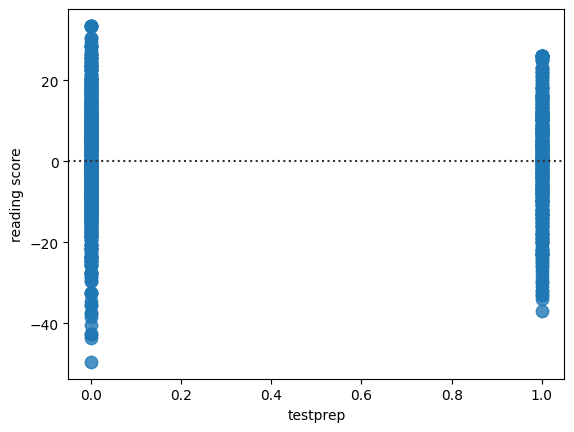

In [47]:
sns.residplot(x='testprep', y='reading score', data=df, scatter_kws={'s': 80})
print("Since these are binary values, variance on the y plane is what we're looking for.\n"\
      "We can see that completing test prep (1) has higher scores already.")

Again, binary values! We have a quite a bit of variance. Though there
are some outliers, I don't think we need to remove them.


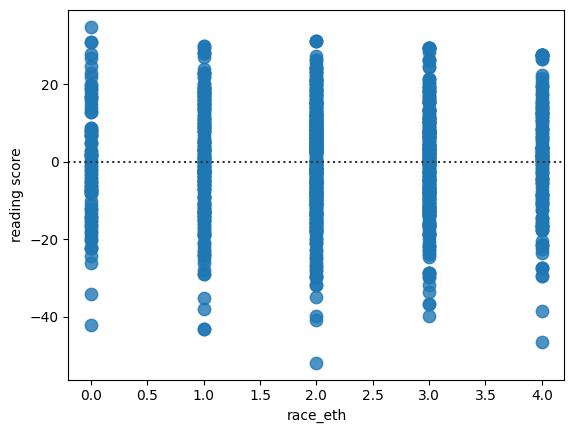

In [48]:
sns.residplot(x='race_eth', y='reading score', data=df, scatter_kws={'s': 80})
print("Again, binary values! We have a quite a bit of variance. Though there\n"\
      "are some outliers, I don't think we need to remove them.")

Talk about normality! You could take the line off the graph and still see it through our actuals.
At the top, you can see none of our values exceed 100, but that's expected. These are test scores, so 0-100 is perfect.
Since homoscedasticity mostly applies to the reading scores, these varied numbers are a good sign!


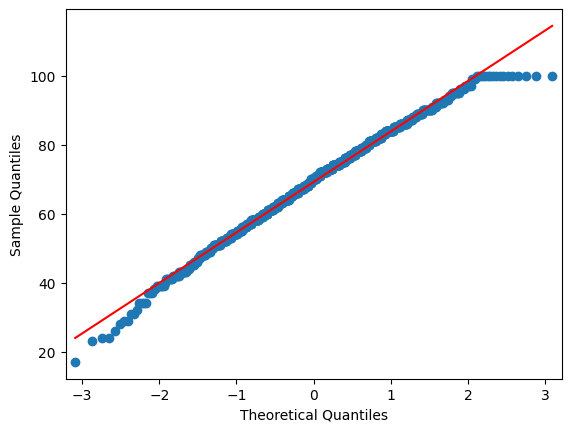

In [49]:
import statsmodels.api as sm
import pylab as py

print("Talk about normality! You could take the line off the graph and still see it through our actuals.\n"\
      "At the top, you can see none of our values exceed 100, but that's expected. These are test scores, so 0-100 is perfect.\n"\
      "Since homoscedasticity mostly applies to the reading scores, these varied numbers are a good sign!")
sm.qqplot(df['reading score'], line = 'r')
py.show()


# Exploring Connections through Graphs

This graph indicates that students who are on the standard lunch program (0) tend to perform better
than those on free or reduced (1). This definitely has more factors to it though. Whether someone is on free/reduced lunch
depends on the income of their family, which can really limit the resources you have available to you.

Our line goes from low scores being at ~.8 (1 = free and reduced) to high scores
being at about .17 (0 = standard.) These are pretty strong indicators, and we can know
almost for sure that lunch program affects our test score.


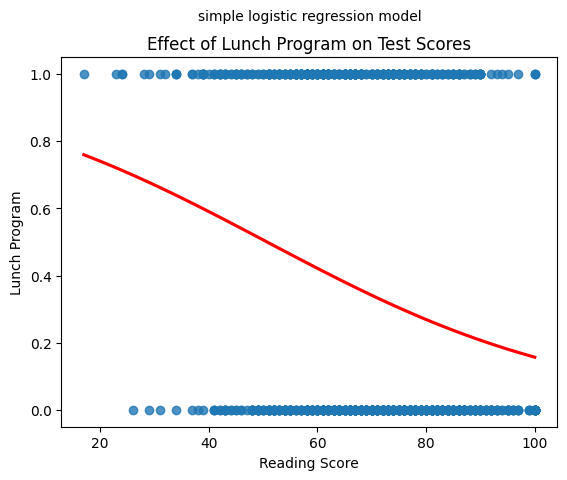

In [50]:
#comparing reading scores to lunch programs

targetA = df['lunch_program']
features = df['reading score']

sns.regplot(x=features, y=targetA, data=df,
            line_kws={'color': 'red'}, logistic=True, ci=None)
plt.title("Effect of Lunch Program on Test Scores")
plt.text(x = 38, y = 1.16, s = "simple logistic regression model")
plt.xlabel("Reading Score")
plt.ylabel("Lunch Program")

print("This graph indicates that students who are on the standard lunch program (0) tend to perform better\n"\
      "than those on free or reduced (1). This definitely has more "\
      "factors to it though. Whether someone is on free/reduced lunch\n"\
      "depends on the income of their family, which can really limit the resources you have available to you.")
print("\nOur line goes from low scores being at ~.8 (1 = free and reduced) to high scores\n"\
      "being at about .17 (0 = standard.) These are pretty strong indicators, and we can know\n"\
      "almost for sure that lunch program affects our test score.")

Are you a girl (0)? Congrats, you're more likely to do well! Low scores start out
at around .83 (1 = male), an unexpectedly high amount. High scores?
Around .22 (0 = female). That each end is 20 points away from 100% male/female is insane.
It raises a question: what about being a girl makes you do better (on average)?
That's not in our sphere. There are plenty of studies out there that do cover this though!


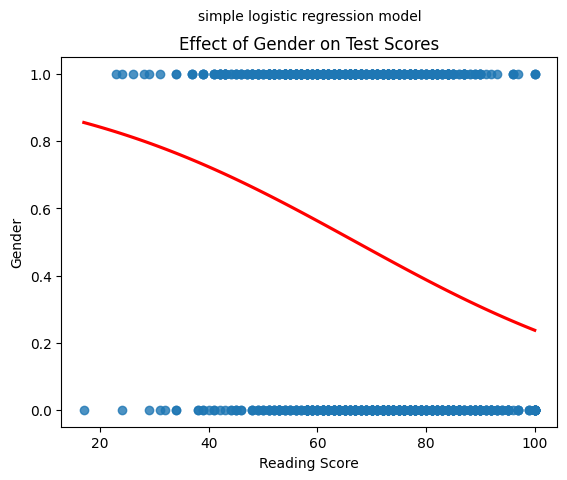

In [51]:
#comparing reading scores to gender

features = df['reading score']
targetB = df['gender']

sns.regplot(x=features, y=targetB, data=df,
            line_kws={'color': 'red'}, logistic=True, ci=None)
plt.title("Effect of Gender on Test Scores")
plt.text(x = 38, y = 1.16, s = "simple logistic regression model")
plt.xlabel("Reading Score")
plt.ylabel("Gender")
print("Are you a girl (0)? Congrats, you're more likely to do well! Low scores start out\n"\
      "at around .83 (1 = male), an unexpectedly high amount. High scores?\n"\
      "Around .22 (0 = female). That each end is 20 points away from 100% male/female is insane.\n"\
      "It raises a question: what about being a girl makes you do better (on average)?\n"\
      "That's not in our sphere. There are plenty of studies out there that do cover this though!")

It looks like the completion of test prep (0 = not completed, 1 = completed)
seems to raise reading scores on average. Following the line, we can see
that as we get closer to 100, the line goes up---meaning more students who
achieved this score completed prep (1). It looks impressive...but actually,
the tail of this line ends at just about .63. The line slopes of our
other graphs show that this connection is not nearly as strong as those!


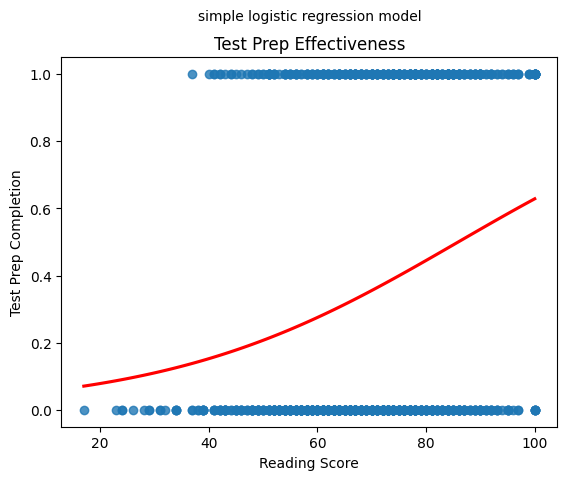

In [52]:
#comparing reading scores to test prep completion

features = df['reading score']
targetC = df['testprep']

sns.regplot(x=features, y=targetC, data=df,
            line_kws={'color': 'red'}, logistic=True, ci=None)
plt.title("Test Prep Effectiveness")
plt.text(x = 38, y = 1.16, s = "simple logistic regression model")
plt.xlabel("Reading Score")
plt.ylabel("Test Prep Completion")
print("It looks like the completion of test prep (0 = not completed, 1 = completed)\n"\
      "seems to raise reading scores on average. Following the line, we can see\n"\
      "that as we get closer to 100, the line goes up---meaning more students who\n"\
      "achieved this score completed prep (1). It looks impressive...but actually,\n"\
      "the tail of this line ends at just about .63. The line slopes of our\n"\
      "other graphs show that this connection is not nearly as strong as those!")

#Time for Logistic Regression!

# Overall regression

In [69]:
#293 bc of binaries
feature_set = ['gender', 'testprep', 'lunch_program'] #independent and ALL BINARY
features = df[feature_set]
target = df['reading score']

In [70]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

### Yes, this accuracy number is right.
With these variables, it's hard for regression to determine the connection between every one...so let's go between each variable, one by one!

In [71]:
logreg = LogisticRegression()
logreg.fit(feature_train, target_train)

predictions = logreg.predict(feature_test)

print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(target_test, predictions)}\n')

Logistic Regression Model Accuracy: 0.03



# Let's compare testprep and reading scores.

Logistic Regression Model Accuracy: 0.6466666666666666

Confusion matrix = 
[[172  23]
 [ 83  22]]

True Negatives  | False Positives

----------------|----------------

False Negatives | True Positives 



<Axes: >

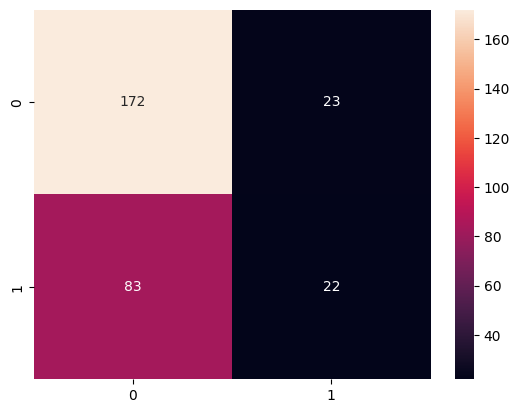

In [62]:
features = df['reading score'].to_numpy().reshape(-1,1)
targeta = df['testprep'].to_numpy()

feature_train, feature_test, targeta_train, targeta_test = train_test_split(features, targeta, test_size=0.3, random_state=1)

logreg = LogisticRegression()
logreg.fit(feature_train, targeta_train)

predictions = logreg.predict(feature_test)

print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(targeta_test, predictions)}\n')

# Add a confusion matrix
print(f'Confusion matrix = \n{confusion_matrix(targeta_test, predictions)}\n')
print(f'True Negatives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Positives \n')

cm = confusion_matrix(targeta_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

# Comparing lunch programs to reading scores is pretty accurate too.

Logistic Regression Model Accuracy: 0.6533333333333333

Confusion matrix = 
[[186   2]
 [102  10]]

True Negatives  | False Positives

----------------|----------------

False Negatives | True Positives 



<Axes: >

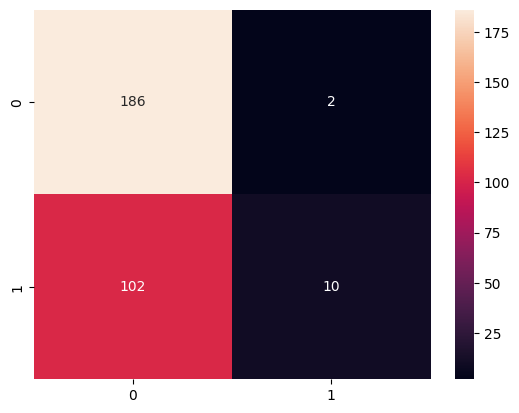

In [58]:
features = df['reading score'].to_numpy().reshape(-1,1)
targetb = df['lunch_program'].to_numpy()

feature_train, feature_test, targetb_train, targetb_test = train_test_split(features, targetb, test_size=0.3, random_state=1)

logreg = LogisticRegression()
logreg.fit(feature_train, targetb_train)

predictions = logreg.predict(feature_test)

print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(targetb_test, predictions)}\n')

# Add a confusion matrix
print(f'Confusion matrix = \n{confusion_matrix(targetb_test, predictions)}\n')
print(f'True Negatives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Positives \n')

cm = confusion_matrix(targetb_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

# Gender is slightly lower, but that's okay!

Logistic Regression Model Accuracy: 0.5933333333333334

Confusion matrix = 
[[107  63]
 [ 59  71]]

True Negatives  | False Positives

----------------|----------------

False Negatives | True Positives 



<Axes: >

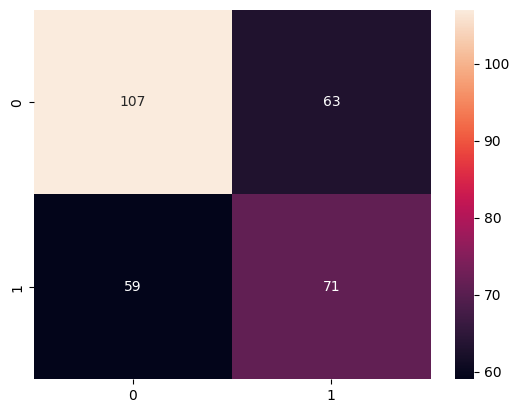

In [60]:
features = df['reading score'].to_numpy().reshape(-1,1)
targetc = df['gender'].to_numpy()

feature_train, feature_test, targetc_train, targetc_test = train_test_split(features, targetc, test_size=0.3, random_state=1)

logreg = LogisticRegression()
logreg.fit(feature_train, targetc_train)

predictions = logreg.predict(feature_test)

print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(targetc_test, predictions)}\n')

# Add a confusion matrix
print(f'Confusion matrix = \n{confusion_matrix(targetc_test, predictions)}\n')
print(f'True Negatives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Positives \n')

cm = confusion_matrix(targetc_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

### Final save:

In [72]:
df.to_csv("FinalAnalyzedExams.csv")

### Why do the other models work, but not the overall model (the first one)?

There are a lot of binary numbers here. When you look at the Logistic Regression examples (ipynb and in the book), the input is tangible numbers. The output is a *binary number.*

In the reverse, (I theorize) that with these variables, all of them independent and binary, trying to produce a tangible number is *incredibly difficult*. Plus, if you try to switch it around with the input of one (1) tangible number, how could logreg know which of three binary variables are 0 or 1?

When a binary variable is associated with a tangible number, logreg can see the connections. With an input of scores, logreg tries to produce whether a score's binary value is 0 or 1. (Ex: reading score is 79. Logreg returns 1 (test prep completed).)

Still not perfect, but I can say that the accuracy is more than a 50/50. Gender...pretty close. But test prep and lunch program's accuracy scores are in the mid 60s! I'm not asking for perfection, I'm asking for a little bit more than pure chance.

# Conclusion

Performing logistic regression analysis on this data was not totally pointless. Looking at these numbers initially, we thought that our model would be a fairly accurate one. Especially seeing the quantity of variables that were important, like if the student was in a free or reduced lunch program, whether they did test prep, and what gender they are. Turning scores into a pass/fail system could possibly increase accuracy in our current model. But I can definitely say that to make this model better, we would need more tangible numbers!

Some examples/suggestions: age, grade, GPA especially, and scores on practice tests (I add this because they are usually required)! With these more meaningful numbers, I believe our model would work much better...although with these variables, we would probably use linear regression.

Alternatively, we could use these numbers as input to produce a binary *output* as a pass/fail system.

Finding that we didn't have an accurate model or adequate information is not a failure. It's better to know that *we know we don't have all we need* for a good model than to try and pass off a model (with all variables) with a 3% accuracy score. We are, though somewhat disappointed, still proud of the work and effort we have put in so far and even now. Our only fault was accidentally selecting a faulty dataset.



---


### Group 7

Members: Olivia Evans, Mongolia Lee, Jubal Whitlatch